# Microsoft Movie Analysis Project

### Imported packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
con = sqlite3.connect('Data/im.db')
cursor_obj = con.cursor()

### Imported Data sets

In [2]:
mov_gross = pd.read_csv('Data/bom.movie_gross.csv.gz')
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
mov_info = pd.read_table('Data/rt.movie_info.tsv')
reviews = pd.read_table('Data/rt.reviews.tsv', encoding= 'unicode_escape')
rot_tom = pd.read_csv('Data/rotten_tomatoes_movies.csv')
db_mov = pd.read_csv('Data/tmdb.movies.csv.gz', delimiter = ",")

### Looked at each dataset.info() to find the relevant information.

In [3]:
db_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


## Recommendation 1: Genres based on Popularity and Voter Average

### Exploding the genre column to be able to plot the genres based on its popularity. created a genre dictionary from imdb genre ids


In [4]:
genre_dic = {'Action'      :    28,
'Adventure'    :   12,
'Animation'     :  16,
'Comedy'         : 35,
'Crime'          : 80,
'Documentary'    : 99,
'Drama'          : 18,
'Family'         : 10751,
'Fantasy'        : 14,
'History'        : 36,
'Horror'         : 27,
'Music'          : 10402,
'Mystery'        : 9648,
'Romance'        : 10749,
'Science Fiction' : 878,
'TV Movie'       : 10770,
'Thriller'       : 53,
'War'            : 10752,
'Western'        : 37}


## Cleaned The Data 
#### Switched the keys and values for the dictionary so it was easier to access. if we inserted the genre id, now we can recieve the genre name. Also, any empty lists are replaces as NaN

In [5]:
gd= {str(y): x for x,y in genre_dic.items()}

gd[''] = np.nan

gd['28']

'Action'

#### deleted the single quotes between the genre id

In [6]:
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: (x.replace("'", '')))

#### deleted the square brackets

In [7]:
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace(']',''))
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace('[',''))

####  deleted the commas 

In [8]:
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: x.split(','))

#### replaced the extra spaces with single spaces

In [9]:
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: [i.replace(' ','') for i in x])

#### for each genre dic item, make i in x (the genre_ids) the same.

In [10]:
db_mov['genre_names']= db_mov['genre_ids'].apply(lambda x: [gd[i]  for i in x])

#### explode the genre_names in the dataframe

In [11]:
exploded_genre_df = db_mov.explode('genre_names')

In [12]:
exploded_genre_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Fantasy
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Family
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Adventure
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,Action
26516,26516,"[53, 27]",309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,Thriller


### Created a bar plot for genres grouped by average popularity

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'History'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Science Fiction'),
  Text(15, 0, 'TV Movie'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

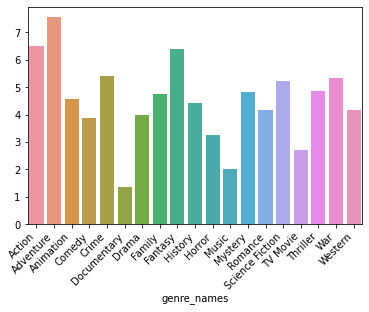

In [13]:
fix, ax = plt.subplots()
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values)
plt.xticks(rotation=45, ha='right')

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


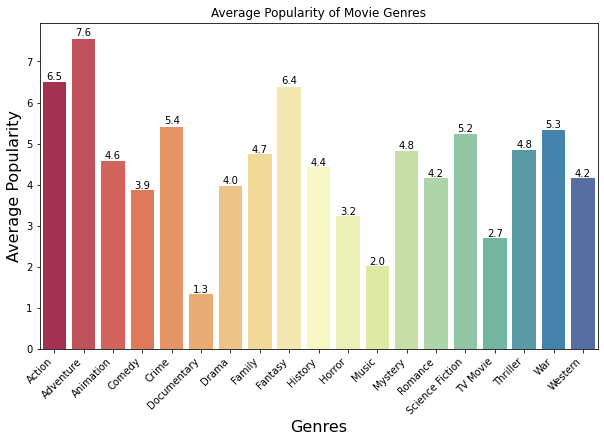

In [14]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values,
            palette = "Spectral")
            
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genres', fontsize =16)
plt.ylabel('Average Popularity', fontsize =16)
ax.set(title='Average Popularity of Movie Genres')
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize=10) 

### Create a bar plot for genres grouped by voter average

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


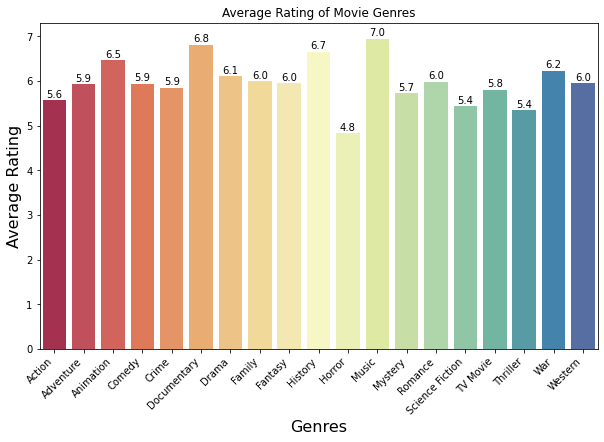

In [15]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(exploded_genre_df.groupby('genre_names')['vote_average'].mean().index,
            exploded_genre_df.groupby('genre_names')['vote_average'].mean().values,
            palette = "Spectral")
            
plt.xticks(rotation=45, ha='right')

plt.xlabel('Genres', fontsize=16);
plt.ylabel('Average Rating', fontsize=16);
ax.set(title='Average Rating of Movie Genres')

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center", fontsize=10) 

### Made a scatterplot to see if average rating and average popularity have a correlation - they dont

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Average Popularity')

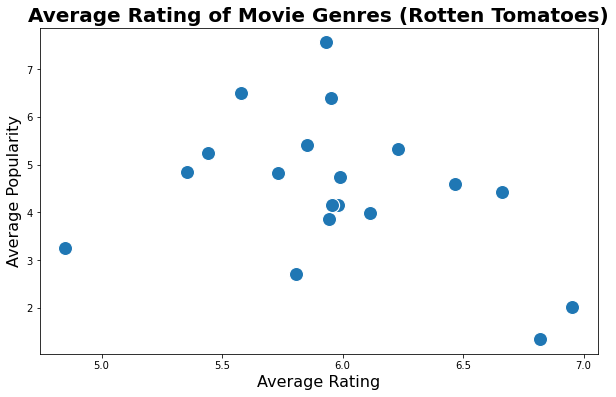

In [16]:
fix, ax = plt.subplots(1,1, figsize=(10,6))
chart = sns.scatterplot(exploded_genre_df.groupby('genre_names')['vote_average'].mean().values,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values,
            palette = "Spectral",
            s = 200)
chart.set_title('Average Rating of Movie Genres (Rotten Tomatoes)', fontdict={'size': 20, 'weight': 'bold', 'color': 'black'})
plt.xlabel('Average Rating', fontsize = 16)
plt.ylabel('Average Popularity', fontsize = 16)


### Sorted the exploded db_mov based on highest to lowest popularity

In [17]:
exploded_genre_df.sort_values(by = 'popularity', ascending = False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Adventure
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Fantasy
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Action
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Action
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
14022,14022,[10402],285621,en,Spacehog: Summerland 2014,0.600,2014-06-26,Spacehog: Summerland 2014,4.0,2,Music
14023,14023,"[35, 16, 12]",280890,en,Wings: Sky Force Heroes,0.600,2014-07-08,Wings: Sky Force Heroes,4.0,2,Comedy
14023,14023,"[35, 16, 12]",280890,en,Wings: Sky Force Heroes,0.600,2014-07-08,Wings: Sky Force Heroes,4.0,2,Animation
14023,14023,"[35, 16, 12]",280890,en,Wings: Sky Force Heroes,0.600,2014-07-08,Wings: Sky Force Heroes,4.0,2,Adventure


### Looked at Rotten Tomato dataset and exploded the genres 

In [18]:
rot_tom

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,...,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,...,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [19]:
rot_tom['genre_names'] = rot_tom['genres'].str.split(',')

In [20]:
rt_explode = rot_tom.explode('genre_names')

In [21]:
rt_explode.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'genre_names'],
      dtype='object')

In [22]:
rt_explode.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,genre_names
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Action & Adventure
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Comedy
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Drama
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,Science Fiction & Fantasy
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,Comedy


In [23]:
rt_explode.groupby('genre_names')['tomatometer_rating'].mean()

genre_names
 Animation                    64.400000
 Anime & Manga                75.368421
 Art House & International    67.589099
 Classics                     76.865922
 Comedy                       61.928058
 Cult Movies                  63.573171
 Documentary                  77.208211
 Drama                        65.517241
 Faith & Spirituality         63.886076
 Gay & Lesbian                57.410256
 Horror                       55.831512
 Kids & Family                55.437676
 Musical & Performing Arts    71.010152
 Mystery & Suspense           55.983632
 Romance                      60.579031
 Science Fiction & Fantasy    55.866189
 Special Interest             77.463217
 Sports & Fitness             71.005618
 Television                   72.574627
 Western                      68.575342
Action & Adventure            54.184359
Animation                     63.882979
Art House & International     71.829450
Classics                      79.120721
Comedy                      

In [24]:
rt_explode = rt_explode.head(15)

### Made a scatterplot of the average audience rating and critic rating to see any discrepency

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


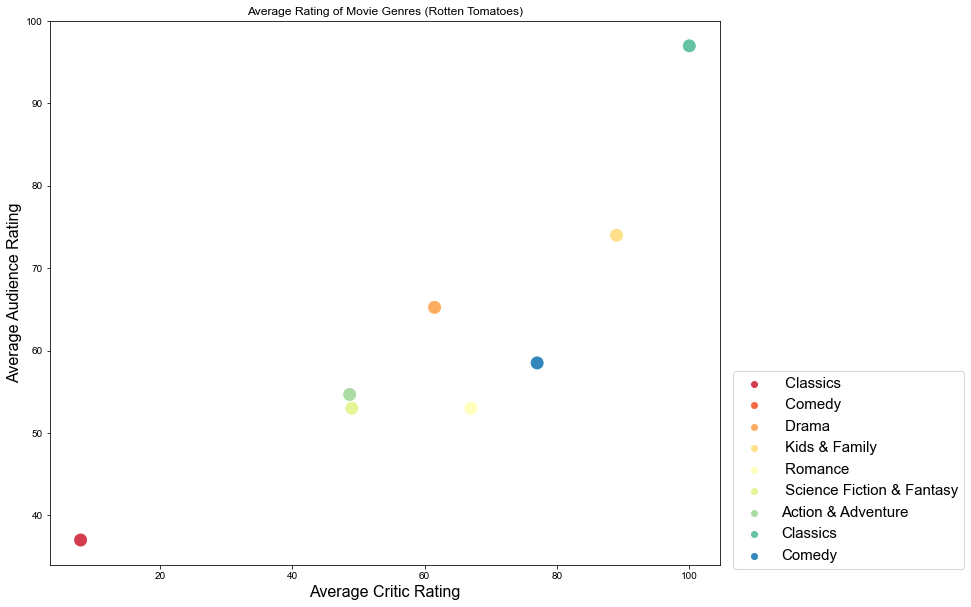

In [25]:
fix, ax = plt.subplots(1,1, figsize=(12,10))
sns.scatterplot(rt_explode.groupby('genre_names')['tomatometer_rating'].mean().values,
                rt_explode.groupby('genre_names')['audience_rating'].mean().values,
                hue = rt_explode.groupby('genre_names')['audience_rating'].mean().index,
                s=200,
                palette = "Spectral")

plt.xlabel('Average Critic Rating', fontsize=16);
plt.ylabel('Average Audience Rating', fontsize=16);
ax.set(title='Average Rating of Movie Genres (Rotten Tomatoes)')
plt.legend(bbox_to_anchor=(1.02, 0.357), loc='upper left', borderaxespad=0, fontsize = 15)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
#for i in range(rt_explode.groupby('genre_names')['tomatometer_rating'].mean().size):
    #plt.text(x=rt_explode.groupby('genre_names')['tomatometer_rating'].mean()[i]+0.4,
            #y=rt_explode.groupby('genre_names')['audience_rating'].mean()[i]+0.3,
             #s=rt_explode.groupby('genre_names')['tomatometer_rating'].mean().index[i])

### We made this plot to see if there is a discrepency between audience rating and critic ratings. this plot shows there is a clear correlation between the two 

## Recommendation 2: Highest ROI Genres and Months

### SQL Query Data Pull

In [26]:
cursor_obj.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
im_table_names = cursor_obj.fetchall()
im_table_names
#Fetching all SQL table names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [27]:
movie_basics_query = pd.read_sql("""
SELECT primary_title,start_year,runtime_minutes,genres
    FROM movie_basics
;
""", con)
#Pulling specific columns from movie_basics SQL table

In [28]:
movie_basics = pd.DataFrame(movie_basics_query)
movie_basics
#Converting query to dataframe format

,primary_title,start_year,runtime_minutes,genres
0,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,The Other Side of the Wind,2018,122.0,Drama
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,Dankyavar Danka,2013,NaN,Comedy
146142,6 Gunn,2017,116.0,None


### Formatting CSV Data

In [29]:
tn_movie_budgets["production_budget"] = tn_movie_budgets["production_budget"].str.replace("$","").str.replace(",","").astype(int)
#Stripping column of characters and converting to integers

In [30]:
tn_movie_budgets["domestic_gross"] = tn_movie_budgets["domestic_gross"].str.replace("$","").str.replace(",","").astype(int)

In [31]:
tn_movie_budgets["worldwide_gross"] = tn_movie_budgets["worldwide_gross"].str.replace("$","").str.replace(",","").astype("int64")

In [32]:
tn_movie_budgets["ROI"] = (tn_movie_budgets["worldwide_gross"] - tn_movie_budgets["production_budget"]) / tn_movie_budgets["production_budget"]
#Creating ROI column with ROI formula as the input

In [33]:
tn_movie_budgets["release_date"] = pd.to_datetime(tn_movie_budgets["release_date"])
#Converting release date column to date-time format

In [34]:
tn_movie_budgets['year'] = tn_movie_budgets['release_date'].dt.year
tn_movie_budgets
#Creating year column from release_date column

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5.532577,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.546673,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.572108,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.243841,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.153696,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-1.000000,2018
5778,79,1999-04-02,Following,6000,48482,240495,39.082500,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-0.732400,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1.000000,2015


### Merging SQL Query With Budgets CSV

In [35]:
merged = movie_basics.merge(tn_movie_budgets , how = 'inner' ,right_on= ['movie', 'year'], left_on = ['primary_title','start_year' ])
#Merging SQL movie_basics df with tn_movie_budgets df

In [36]:
budgets_and_genres = merged.sort_values(by = "ROI",ascending = False)
#Sorting by highest ROI

### Dropping Null Values

In [37]:
budgets_and_genres.dropna(inplace = True)
#Dropping null values

### Seperating Genres into Individual Rows to Get Mean ROI For Each

In [38]:
budgets_and_genres["genres"] = budgets_and_genres["genres"].str.split(",")
#Turning genre column rows into lists

In [39]:
budgets_and_genres_explode = budgets_and_genres[['primary_title', 'genres', 'ROI']].explode('genres')
#Exploding merged table based on genre to get individual rows of movies and their seperate genres with the same index

In [40]:
budgets_and_genres_explode.groupby(by="genres").mean("ROI")
#Grouping results by genre along with their mean ROI

,ROI
genres,
Action,1.599989
Adventure,2.084312
Animation,2.674419
Biography,2.381621
Comedy,2.151968
Crime,1.149873
Documentary,1.935229
Drama,2.151777
Family,1.545830


### Finding and Removing Outliers within Merged Data

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ROI'>

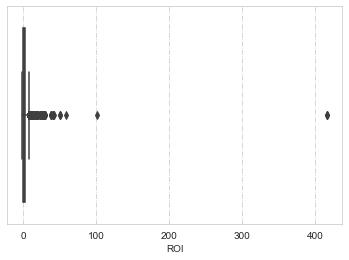

In [41]:
sns.boxplot(budgets_and_genres_explode['ROI'])
#Using boxplot to determine ROI outliers in the data

In [42]:
outliers_remove = budgets_and_genres_explode.drop(budgets_and_genres_explode[(budgets_and_genres_explode["ROI"] > 100) | (budgets_and_genres_explode["ROI"] < 0)].index)
outliers_remove
#Removing outliers with ROI > 100 and ROI < 0 

,primary_title,genres,ROI
485,Paranormal Activity 2,Horror,58.170677
1431,Get Out,Horror,50.073590
1431,Get Out,Mystery,50.073590
1431,Get Out,Thriller,50.073590
1423,Moonlight,Drama,42.497008
...,...,...,...
634,Stoker,Drama,0.002909
634,Stoker,Thriller,0.002909
112,Hugo,Adventure,0.000265
112,Hugo,Drama,0.000265


### Determining Mean ROI Per Genre

In [43]:
mean_ROI = outliers_remove.groupby(by="genres").mean("ROI")
mean_ROI
#Creating mean ROI per movie genre table

,ROI
genres,
Action,2.441660
Adventure,2.559687
Animation,3.043752
Biography,3.908969
Comedy,3.038640
Crime,2.127588
Documentary,3.863989
Drama,3.705758
Family,2.248962


### Graphing the Data for Mean ROI Per Genre

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


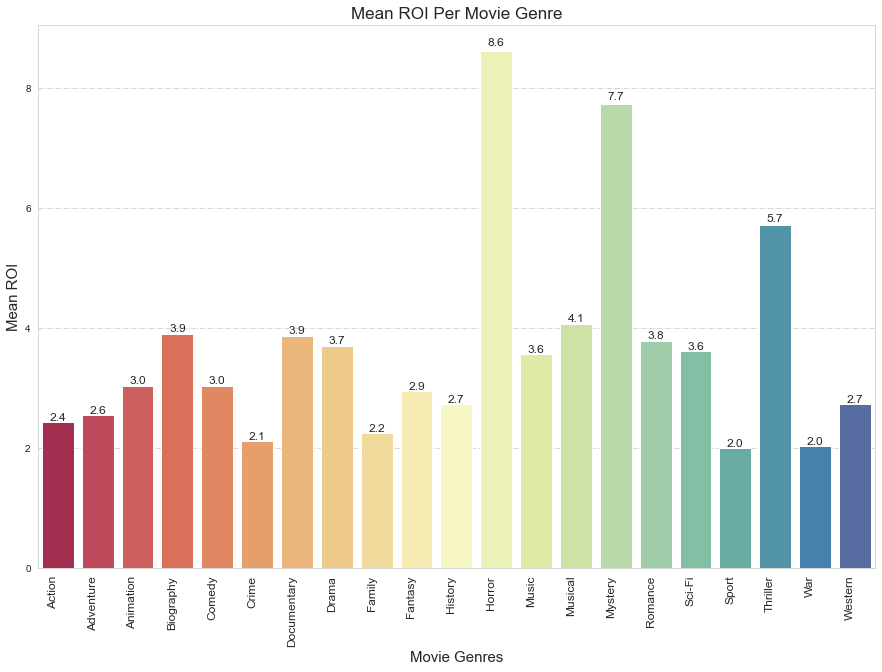

In [44]:
fix, ax = plt.subplots(figsize=(15,10))
sns.barplot(outliers_remove.groupby(by="genres")["ROI"].mean().index,
            outliers_remove.groupby(by="genres")["ROI"].mean().values,
           palette = "Spectral")
plt.xticks(rotation=90, ha='right', fontsize = 12)
plt.xlabel("Movie Genres",fontsize = 15)
plt.ylabel("Mean ROI",fontsize = 15)
ax.set_title("Mean ROI Per Movie Genre",fontsize = 17)

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
    value = '{:.1f}'.format(p.get_height())
    ax.text(_x, _y, value, ha="center",fontsize = 12)
    
#Grpahing Mean ROI per genre

### Adding Release Date to Data and Seperating by Month

In [45]:
months_genres_explode = budgets_and_genres[['primary_title', 'genres', 'ROI',"release_date"]].explode('genres')
months_genres_explode = months_genres_explode.drop(budgets_and_genres[(budgets_and_genres["ROI"] > 100) | (budgets_and_genres["ROI"] < 0)].index)
#Exploding rows based on genres and removing outliers from ROI

In [46]:
months_genres_explode["month"] = months_genres_explode["release_date"].dt.strftime("%m")
months_genres_explode["month"].value_counts()
#Seperating month from release date

11    285
12    273
10    259
07    259
09    240
08    239
03    235
06    227
05    200
04    196
02    190
01    138
Name: month, dtype: int64

### Grouping Data by Month to Get Mean ROI

In [47]:
mean_ROI_months = months_genres_explode.groupby(by="month").mean("ROI")
mean_ROI_months
#Grouping mean ROI by month

,ROI
month,
01,3.431729
02,4.004704
03,2.962870
04,3.107587
05,3.161290
06,3.879032
07,4.668562
08,2.948467
09,3.260842


### Graphing Mean ROI Across Months

C:\Users\biann\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-48-73ac15feb87a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

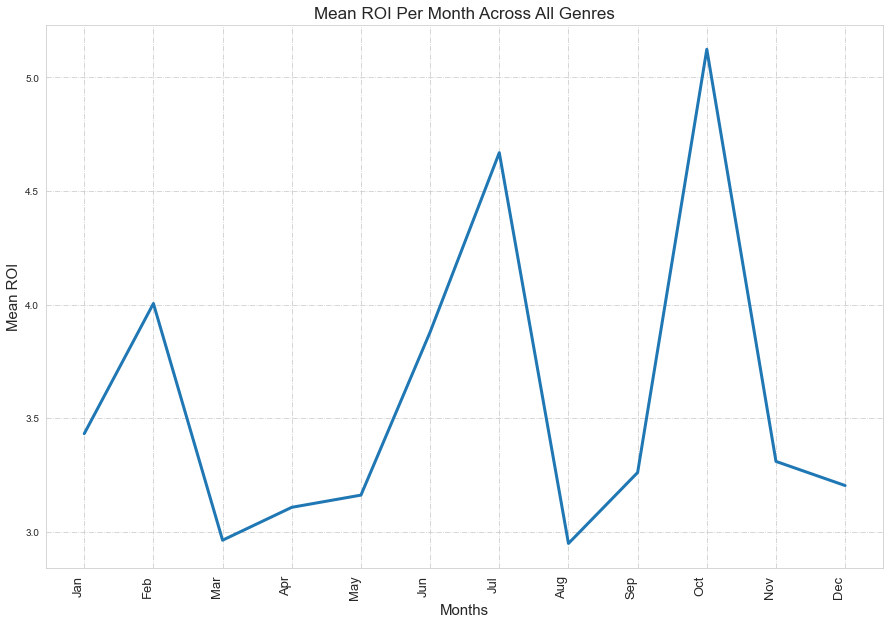

In [48]:
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

fix, ax = plt.subplots(figsize=(15,10))
sns.lineplot(months_genres_explode.groupby(by="month")["ROI"].mean().index,
            months_genres_explode.groupby(by="month")["ROI"].mean().values,
            linewidth = 3)
plt.xticks(rotation=90, ha='right',fontsize = 13)
plt.xlabel("Months",fontsize = 15)
plt.ylabel("Mean ROI", fontsize = 15)
ax.set_title("Mean ROI Per Month Across All Genres",fontsize = 17)
ax.set_xticklabels(labels)

#Graphing Mean ROI Across Months

# RECOMMENDATION 3: ACTORS BASED ON POPULARITY

CREATING A TABLE WITH ACTORS/ACTRESS AND THEIR NAMES

In [49]:
#loading and specifying columns in principals table
persons_ = pd.read_sql("""
SELECT movie_id, person_id, category
FROM principals
WHERE category = 'actor' OR category = 'actress';
""", con)

In [50]:
#loading and specifying columns in persons table
persons_name = pd.read_sql("""
SELECT person_id, primary_name, primary_profession
FROM persons
WHERE primary_profession = 'actor' OR primary_profession = 'actress'
""", con)

In [51]:
#converting tables to PD DataFrame
persons_df = pd.DataFrame(persons_)
persons_name_df = pd.DataFrame(persons_name)

In [52]:
#merging both DataFrames based on common column: person_id
merged_df = pd.merge(persons_, persons_name, on = 'person_id')

In [53]:
merged_df.drop(columns = 'primary_profession', inplace = True)

Adding Movie_basics table & ratings table to the dataframe

In [54]:
#adding movie basics to a dataframe
movie_info = pd.read_sql("""
SELECT * FROM movie_basics;
""", con)

In [55]:
movies = pd.DataFrame(movie_info)

In [56]:
#removing null values
movies.dropna(axis = 0, inplace = True)

In [57]:
#merging movie dataframe 
movies_actors = pd.merge(merged_df, movies, on = 'movie_id')

In [58]:
#adding movie ratings to a dataframe
ratings = pd.read_sql("""
SELECT * FROM movie_ratings
""", con)

In [59]:
movie_ratings = pd.DataFrame(ratings)

In [60]:
#merging dataframes w. dataframe that was made with actors/actresses info
ratings_mov = pd.merge(movies_actors, movie_ratings, on = 'movie_id')

ADDING MOVIE GROSS VALUES TO THE TABLE

In [61]:
movie_full = pd.merge(ratings_mov, tn_movie_budgets, left_on = 'primary_title', right_on = 'movie')
movie_full

,movie_id,person_id,category,primary_name,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,year
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,Eddie the Eagle,2015,106.0,"Biography,Comedy,Drama",7.4,75331,86,2016-02-26,Eddie the Eagle,23000000,15789389,45060480,0.959151,2016
1,tt1124037,nm0991810,actor,Mahershala Ali,Free State of Jones,Free State of Jones,2016,139.0,"Action,Biography,Drama",6.9,45135,81,2016-06-24,Free State of Jones,50000000,20810036,23237252,-0.535255,2016
2,tt0437086,nm0991810,actor,Mahershala Ali,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,24,2019-02-14,Alita: Battle Angel,170000000,85710210,402976036,1.370447,2019
3,tt0437086,nm0000124,actress,Jennifer Connelly,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,24,2019-02-14,Alita: Battle Angel,170000000,85710210,402976036,1.370447,2019
4,tt4975722,nm0991810,actor,Mahershala Ali,Moonlight,Moonlight,2016,111.0,Drama,7.4,227964,64,2016-10-21,Moonlight,1500000,27854931,65245512,42.497008,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,tt7535280,nm9358590,actor,Andrei Zagorodnii,Teeth,Dintii,2017,71.0,Drama,8.8,25,48,2008-01-18,Teeth,2000000,347578,2350641,0.175320,2008
2869,tt8662424,nm9953795,actress,Toni Allan,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,2002-07-12,Never Again,500000,307631,308793,-0.382414,2002
2870,tt8662424,nm9953794,actress,Kelly Baxter,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,2002-07-12,Never Again,500000,307631,308793,-0.382414,2002
2871,tt8662424,nm9953791,actor,Hawt Carl,Never Again,Never Again,2017,106.0,Drama,5.7,67,47,2002-07-12,Never Again,500000,307631,308793,-0.382414,2002


USING EXPLODE METHOD TO SEPARATE MULTIPLE GENRE VALUES FROM THE GENRE COLUMN

In [62]:
movie_full['genres'] = movie_full['genres'].apply(lambda x: x.split(','))

In [63]:
movie_info_ = movie_full.explode('genres')

In [64]:
#dropping columns that are not needed
movie_info_.drop(['original_title', 'runtime_minutes', 'id', 'movie'], axis=1)

,movie_id,person_id,category,primary_name,primary_title,start_year,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,ROI,year
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,2015,Biography,7.4,75331,2016-02-26,23000000,15789389,45060480,0.959151,2016
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,2015,Comedy,7.4,75331,2016-02-26,23000000,15789389,45060480,0.959151,2016
0,tt1083452,nm8030441,actor,Tom Costello,Eddie the Eagle,2015,Drama,7.4,75331,2016-02-26,23000000,15789389,45060480,0.959151,2016
1,tt1124037,nm0991810,actor,Mahershala Ali,Free State of Jones,2016,Action,6.9,45135,2016-06-24,50000000,20810036,23237252,-0.535255,2016
1,tt1124037,nm0991810,actor,Mahershala Ali,Free State of Jones,2016,Biography,6.9,45135,2016-06-24,50000000,20810036,23237252,-0.535255,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,tt7535280,nm9358590,actor,Andrei Zagorodnii,Teeth,2017,Drama,8.8,25,2008-01-18,2000000,347578,2350641,0.175320,2008
2869,tt8662424,nm9953795,actress,Toni Allan,Never Again,2017,Drama,5.7,67,2002-07-12,500000,307631,308793,-0.382414,2002
2870,tt8662424,nm9953794,actress,Kelly Baxter,Never Again,2017,Drama,5.7,67,2002-07-12,500000,307631,308793,-0.382414,2002
2871,tt8662424,nm9953791,actor,Hawt Carl,Never Again,2017,Drama,5.7,67,2002-07-12,500000,307631,308793,-0.382414,2002


ADVENTURE MOVIES

In [65]:
adv_movies = movie_info_[(movie_info_['genres'] == 'Adventure')]
adv_counts = adv_movies['primary_name'].value_counts().sort_values(ascending = False, inplace = False).head(5)
adv_counts

Mark Strong          4
Kodi Smit-McPhee     3
Matthew Macfadyen    3
Asa Butterfield      3
Karl Urban           3
Name: primary_name, dtype: int64

In [66]:
adv_1 = adv_movies[(adv_movies['primary_name'] == 'Mark Strong')]
adv_2 = adv_movies[(adv_movies['primary_name'] == 'Asa Butterfield')]
adv_3 = adv_movies[(adv_movies['primary_name'] == 'Karl Urban')]
adv_4 = adv_movies[(adv_movies['primary_name'] == 'Matthew Macfadyen')]
adv = pd.concat([adv_1.assign(dataset='adv_1'),adv_2.assign(dataset='adv_2'), adv_3.assign(dataset='adv_3'), adv_4.assign(dataset='adv_4')])

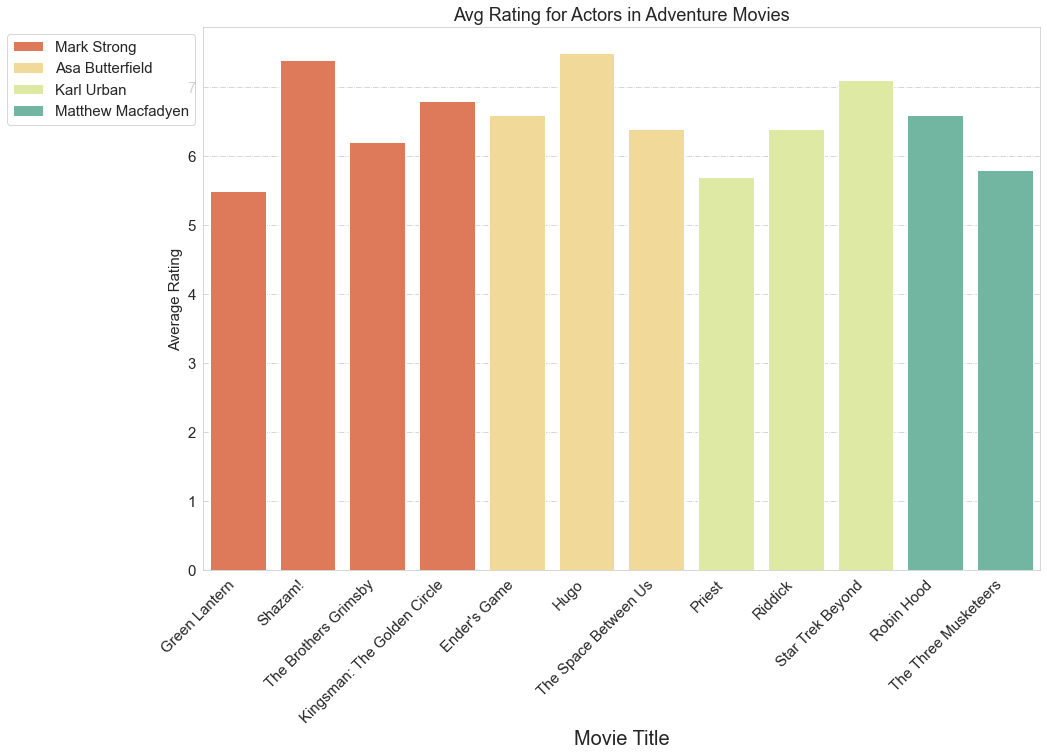

In [67]:
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x = 'primary_title', y = 'averagerating', hue = 'primary_name',data = adv, palette = "Spectral", dodge = False)
ax.set_xlabel('Movie Title', fontdict={'fontsize':20} )
ax.set_ylabel('Average Rating')
ax.set_title('Avg Rating for Actors in Adventure Movies')

plt.legend(loc='upper right', bbox_to_anchor = (0,1))

plt.xticks(rotation=45, ha='right')
 
plt.show()

ACTION MOVIES

In [68]:
act_movies = movie_info_[(movie_info_['genres'] == 'Action')]
act_counts = act_movies['primary_name'].value_counts().sort_values(ascending = False, inplace = False).head(5)
act_counts

Mark Strong          4
Henry Cavill         4
Jennifer Connelly    4
Karl Urban           4
David Harbour        4
Name: primary_name, dtype: int64

In [69]:
act_1 = act_movies[(act_movies['primary_name'] == 'Jennifer Connelly')]
act_2 = act_movies[(act_movies['primary_name'] == 'Henry Cavill')]
act_3 = act_movies[(act_movies['primary_name'] == 'David Harbour')]
act_4 = act_movies[(act_movies['primary_name'] == 'Mark Strong')]
act = pd.concat([act_1.assign(dataset='act_1'),act_2.assign(dataset='act_2'), act_3.assign(dataset='act_3'), act_4.assign(dataset='act_4')])

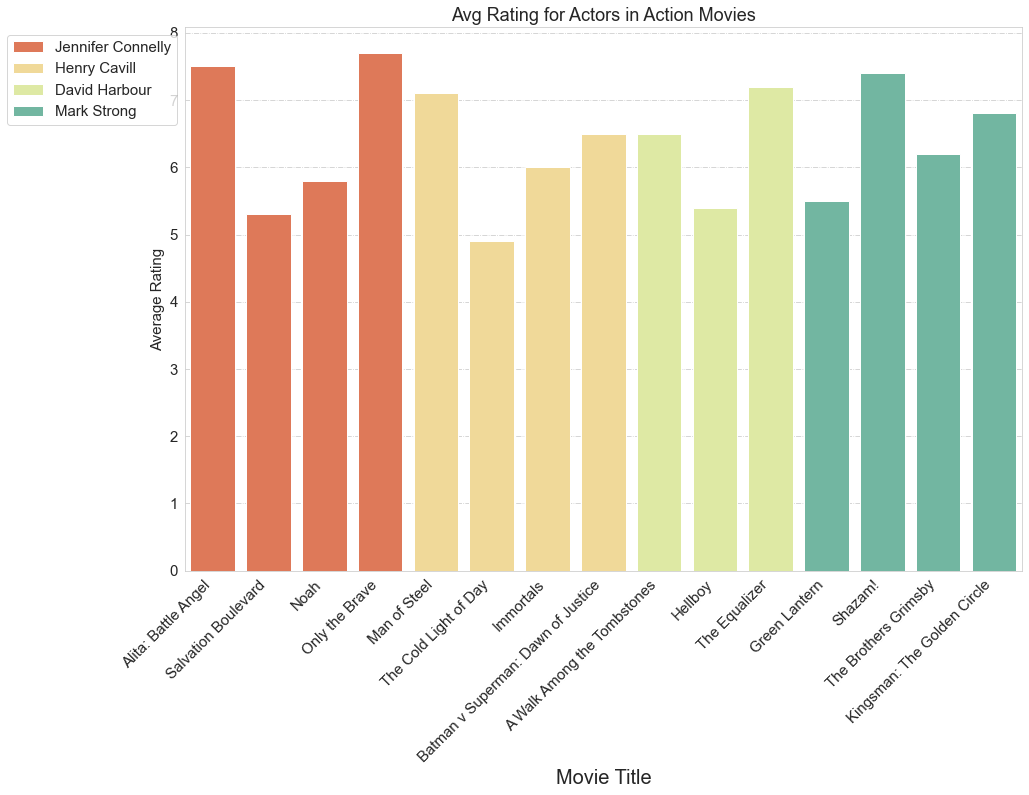

In [70]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x = 'primary_title', y = 'averagerating', hue = 'primary_name',data = act, palette = "Spectral", dodge = False)
ax.set_xlabel('Movie Title', fontdict={'fontsize':20} )
ax.set_ylabel('Average Rating')
ax.set_title('Avg Rating for Actors in Action Movies')

plt.legend(loc='upper right', bbox_to_anchor = (0,1))

plt.xticks(rotation=45, ha='right')
 
plt.show()

HORROR MOVIES

In [71]:
hor_movies = movie_info_[(movie_info_['genres'] == 'Horror')]
hor_counts = hor_movies['primary_name'].value_counts().sort_values(ascending = False, inplace = False).head(5)
hor_counts

Alessandra Shelby Farmer    3
Kerry Knuppe                3
Anya Taylor-Joy             3
Kennedi Clements            2
Gabriella Wilde             2
Name: primary_name, dtype: int64

In [72]:
hor_1 = hor_movies[(hor_movies['primary_name'] == 'Kerry Knuppe')]
hor_2 = hor_movies[(hor_movies['primary_name'] == 'Anya Taylor-Joy')]
hor_3 = hor_movies[(hor_movies['primary_name'] == 'Alessandra Shelby Farmer')]
hor_4 = hor_movies[(hor_movies['primary_name'] == 'Becca Hirani')]
hor = pd.concat([hor_1.assign(dataset='hor_1'),hor_2.assign(dataset='hor_2'), hor_3.assign(dataset='hor_3'), hor_4.assign(dataset='hor_4')])

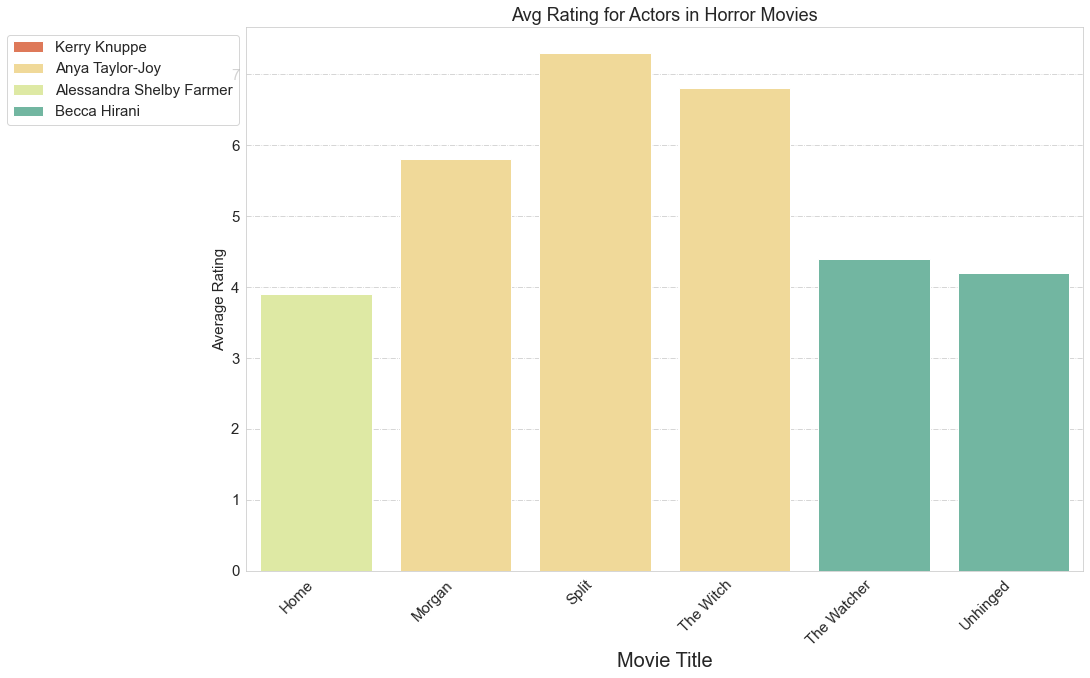

In [73]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize = (15,10))

sns.barplot(x = 'primary_title', y = 'averagerating', hue = 'primary_name',data = hor, palette = "Spectral", dodge = False)
ax.set_xlabel('Movie Title', fontdict={'fontsize':20} )
ax.set_ylabel('Average Rating')
ax.set_title('Avg Rating for Actors in Horror Movies')

plt.legend(loc='upper right', bbox_to_anchor = (0,1))

plt.xticks(rotation=45, ha='right')
 
plt.show()